# Exploratory Data Analysis

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
apps = pd.read_csv('googleplaystore.csv')

### Data Cleaning
apps = apps.drop(apps.columns[apps.columns.str.contains('unnamed',case = False)],axis = 1)
apps = apps.drop_duplicates(subset=['App'])
apps = apps.dropna()
apps = apps[apps['Rating'] != 19]
#apps['Reviews'] = apps['Reviews'].map(lambda r: int(r))
#apps = apps[apps['Reviews'] < 20000000]
apps['Price'] = apps['Price'].map(lambda p: float(p.replace("$", "")))
#apps['Installs'] = apps['Installs'].map(lambda i: int(i[:-1].replace(",", "")))
apps = apps[apps['Price'] < 20]
def size_to_int(s):
    if 'k' in s:
        return float(s.replace("k", "")) / 1024
    elif 'M' in s:
        return float(s.replace("M", ""))
    
apps['Size'] = apps['Size'].map(size_to_int)
apps = apps.dropna()
# Export cleaned data
apps.to_csv('apps.csv')

# Remove unneeded columns
#apps = apps.drop(columns=['Last Updated', 'Current Ver', 'Size', 'Genres', 'Android Ver', 'Type', 'Reviews', 'Installs'])


print('Totals:')
print(apps.shape)
print('%s app entries'  % len(apps))
print('%s unique categories' % len(apps['Category'].unique()))
print('%s unique content ratings' % len(apps['Content Rating'].unique()))
apps.head(3)

Totals:
(6995, 13)
6995 app entries
33 unique categories
6 unique content ratings


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Masha and the Bear: Evolution,FAMILY,4.5,2062,42.0,"500,000+",Free,0.0,Everyone,Strategy;Education,"June 14, 2018",1.0.9,4.0 and up
1,Official Matsumoto Kiyoshi application,LIFESTYLE,3.2,3031,2.7,"1,000,000+",Free,0.0,Everyone,Lifestyle,"July 3, 2018",1.5.3,4.0 and up
2,autolina.ch has over 120'000 cars on offer.,AUTO_AND_VEHICLES,4.2,25,6.5,"10,000+",Free,0.0,Everyone,Auto & Vehicles,"August 2, 2017",1.02,4.2 and up


In [3]:
reviews = pd.read_csv('googleplaystore_user_reviews.csv')

### Data Cleaning
# Drop rows with NaN in any column
reviews = reviews.dropna()
# Export cleaned data
reviews.to_csv('reviews.csv')

print('Totals:')
print(reviews.shape)
print('%s reviews'  % len(reviews))
print('%s unique apps' % len(reviews['App'].unique()))
print('Review sentiments: %s' % reviews['Sentiment'].unique())
reviews.head(3)

Totals:
(37427, 6)
37427 reviews
865 unique apps
Review sentiments: ['Neutral' 'Positive' 'Negative']


,Unnamed: 0,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,5320,Alarm Clock Free,Not working anymore,Neutral,0.000000,0.000000
1,3394,ASUS SuperNote,"I'm trying send feedback, texts appearing scre...",Neutral,0.000000,0.000000
3,30935,Crunchyroll - Everything Anime,"Great place good quality anime, quality bad ei...",Positive,0.133631,0.456548


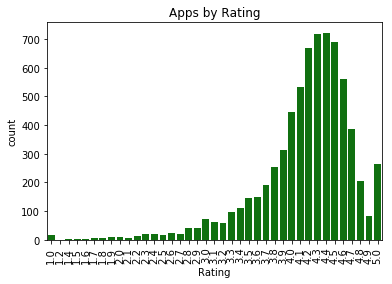

In [4]:
ax = sns.countplot(x="Rating", data=apps, color='g')
ax.set_title("Apps by Rating");
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

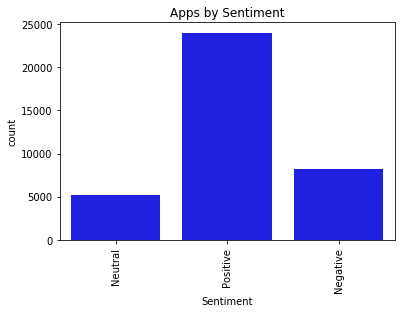

In [5]:
ax = sns.countplot(x="Sentiment", data=reviews, color='b')
ax.set_title("Apps by Sentiment");
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

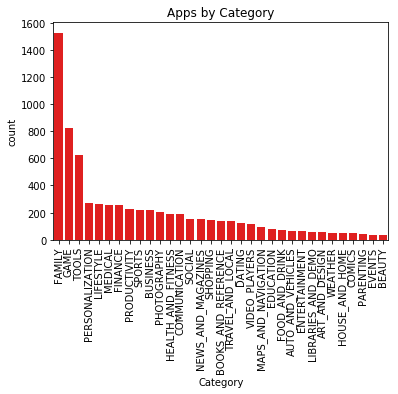

In [8]:
ax = sns.countplot(x='Category', color='r',data=apps.sort_values('Category'),
                 order=apps['Category'].value_counts().index)
ax.set_title("Apps by Category");
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

NameError: name 'columns' is not defined

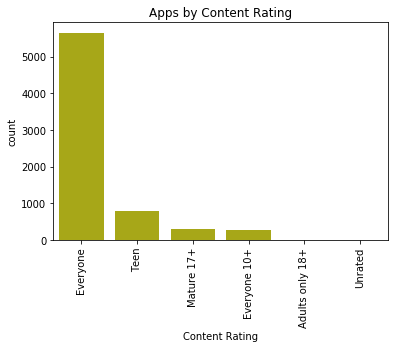

In [13]:
ax = sns.countplot(x='Content Rating', color='y', data=apps.sort_values('Content Rating'),
                   order = apps['Content Rating'].value_counts().index)
ax.set_title("Apps by Content Rating");
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);